In [1]:
# Loading the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the train and test dataset 
train = pd.read_csv('R:/AA_Sign_Language/CNN + MNIST/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('R:/AA_Sign_Language/CNN + MNIST/sign_mnist_test/sign_mnist_test.csv')

In [4]:
# Inspect Training data
train.head(50)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Get training labels
labels = train['label'].values
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [6]:
# Unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

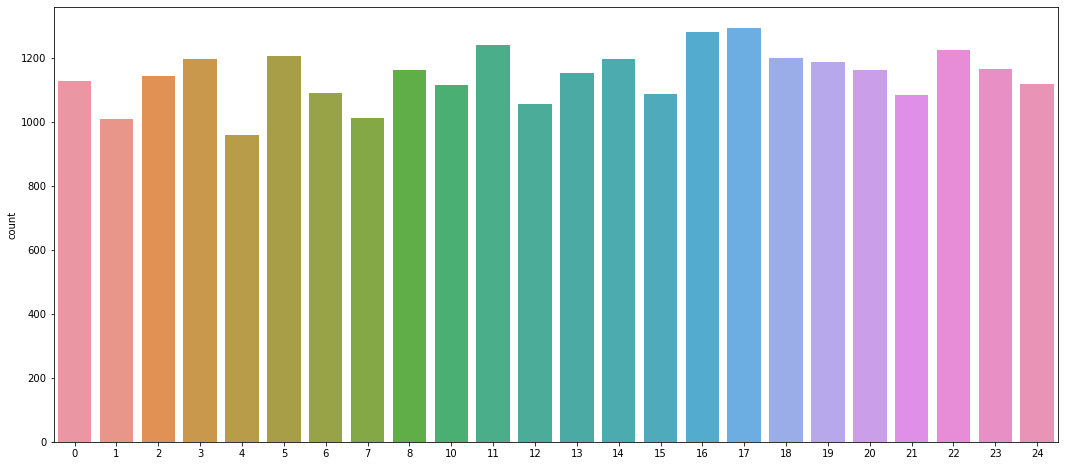

In [7]:
# Plotting the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [8]:
# Dropping Training Labels from the training data 
train.drop('label', axis = 1, inplace = True)

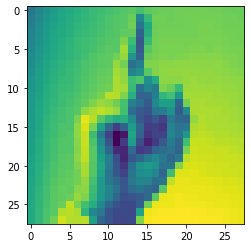

In [9]:
# Extracting the image data from each row in the csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
plt.imshow(images[0].reshape(28,28))

In [12]:
# hot one encoding the labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels) 

In [17]:
# View our labels
labels
#len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


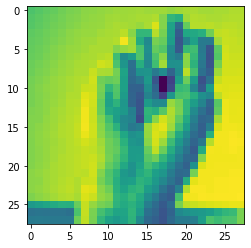

In [19]:
# Inspect an image
index = 4
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [21]:
# Use OpenCV to view 10 random images from our training data
'''import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()'''

'import cv2\nimport numpy as np\n\nfor i in range(0,10):\n    rand = np.random.randint(0, len(images))\n    input_im = images[rand]\n\n    sample = input_im.reshape(28,28).astype(np.uint8)\n    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)\n    cv2.imshow("sample image", sample)\n    cv2.waitKey(0) \n    \ncv2.destroyAllWindows()'

In [23]:
# Splitting  data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [24]:
# loading the tensorFlow modules and defining the batch size
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [25]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255
x_train

array([[0.23137255, 0.38431373, 0.37254902, ..., 0.65882353, 0.66666667,
        0.67058824],
       [0.18039216, 0.2745098 , 0.40392157, ..., 0.3254902 , 0.32156863,
        0.32156863],
       [0.6       , 0.60784314, 0.61568627, ..., 0.76862745, 0.76078431,
        0.75686275],
       ...,
       [0.32941176, 0.35686275, 0.38431373, ..., 0.73333333, 0.56862745,
        0.51372549],
       [0.39607843, 0.41960784, 0.1372549 , ..., 0.69019608, 0.70196078,
        0.70980392],
       [0.70196078, 0.70196078, 0.70196078, ..., 0.25098039, 0.25882353,
        0.27843137]])

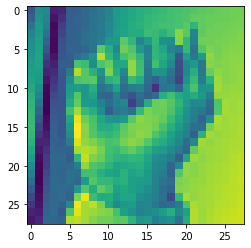

In [26]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [27]:
# Creating CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [28]:
# Compiling the Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [59]:
# Training the Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 29s 190ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9988
Epoch 2/10
151/151 [==============================] - 29s 191ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 6.4150e-04 - val_accuracy: 0.9999
Epoch 3/10
151/151 [==============================] - 27s 182ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9988
Epoch 4/10
151/151 [==============================] - 26s 173ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 5/10
151/151 [==============================] - 25s 169ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 6/10
151/151 [==============================] - 25s 167ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 8.5909e-04 - val_accuracy: 0.9996
Epoch 7/10
151/151 [==============================] - 25s 168ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 5.0783e

In [51]:
# Save our Model
model.save("model2.h5")
print("Model Saved")

Model Saved


In [57]:
# Reshape our test data so that we can evaluate it's performance on unseen data
#test_labels = test['label']
#test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)
y_pred

In [58]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8561070831009482

In [38]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [39]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Testing on Actual Webcam Input

In [40]:
import cv2
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    frame=cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 

    
    
    result = str(model.predict_classes(roi, 1, verbose = 0)[0])
    cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows() 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
